# New York City Airbnb Open Data - Practice

**Attribution**: *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*, 2nd Edition, by Aurelien Geron (O'Reilly). Copyright 2019 Kiwisoft S.A.S, 978-1-492-03264-9<br>

Machine Learning Practice. Implimenting the project following the Chapter-2 project on O'REILLY's Hands-On Machine Learning. <br>

**Goal**: Predict the unit price for a Airbnb post, given all the other metrics. Predict NYC Airbnb Rental Prices<br>
**Approach**:
<ol>
    <li>Supervised Learning task, because given labeled traning examples (each instance comes with expected output, i.e. unit's price).</li>
    <li>Regression task, since we need to predict a value.</li>
    <li>Multiple regression problem since the system will use multiple features to make a prediction.</li>
    <li>Univariate regression problem since we are only trying to predict a single value for each unit.</li>
    <li>There is no continuous flow of data, no need to adjust to changing data, and the data is small enough to fit in memmory: Batch Learning</li>
</ol>

**Possible Performance Measure:** Root Mean Square Error (RMSE), and Mean Absolute Error (MAE).<b>
    
**Data:** [New York City Airbnb Open Data | Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data)
    
**Project Author:** Maksim Ekin Eren

## Load the Data and Peek

In [1]:
import pandas as pd
import os

AIRBNB_PATH  = os.path.join("data", "airbnb")
AIRBNB_FILE  = "AB_NYC_2019.csv"

# function to load the data
def load_airbnb_data(airbnb_path=AIRBNB_PATH, file_name=AIRBNB_FILE):
    csv_path = os.path.join(airbnb_path, file_name)
    return pd.read_csv(csv_path)

# load data and peek top five rows
airbnb = load_airbnb_data()
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


There are 15 attributes in this dataset. Each row represents a unique Airbnb post in New York city. Lets get a quick description of the data:

In [2]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

There are 48,895 instances. It can be seen that we will have to deal with missing data because some attributes have less values; name, host_name, last_review, reviews_per_month.

It seems that neighbourhood_group, neighbourhood, and room_type are categorical data. Lets take a closer look at these:

In [3]:
airbnb["neighbourhood_group"].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [4]:
airbnb["neighbourhood"].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
New Dorp                 1
Woodrow                  1
Rossville                1
Richmondtown             1
Fort Wadsworth           1
Name: neighbourhood, Length: 221, dtype: int64

In [5]:
airbnb["room_type"].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

Lets take a look at numerical data now. We will also format the scientific notation to make it easier to read the results:

In [6]:
# format the scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.00000,48895.00000,48895.00000,48895.00000,48895.00000,48895.00000,48895.00000,38843.00000,48895.00000,48895.00000
mean,19017143.23618,67620010.64661,40.72895,-73.95217,152.72069,7.02996,23.27447,1.37322,7.14398,112.78133
std,10983108.38561,78610967.03267,0.05453,0.04616,240.15417,20.51055,44.55058,1.68044,32.95252,131.62229
min,2539.00000,2438.00000,40.49979,-74.24442,0.00000,1.00000,0.00000,0.01000,1.00000,0.00000
25%,9471945.00000,7822033.00000,40.69010,-73.98307,69.00000,1.00000,1.00000,0.19000,1.00000,0.00000
50%,19677284.00000,30793816.00000,40.72307,-73.95568,106.00000,3.00000,5.00000,0.72000,1.00000,45.00000
75%,29152178.50000,107434423.00000,40.76311,-73.93627,175.00000,5.00000,24.00000,2.02000,2.00000,227.00000
max,36487245.00000,274321313.00000,40.91306,-73.71299,10000.00000,1250.00000,629.00000,58.50000,327.00000,365.00000


It looks like the average price is $152 and usually stays require average of 7 minimum nights. In average, a listing was available (not booked) for 112 nights (ouch). Let's plot the numerical data to see the distributions:

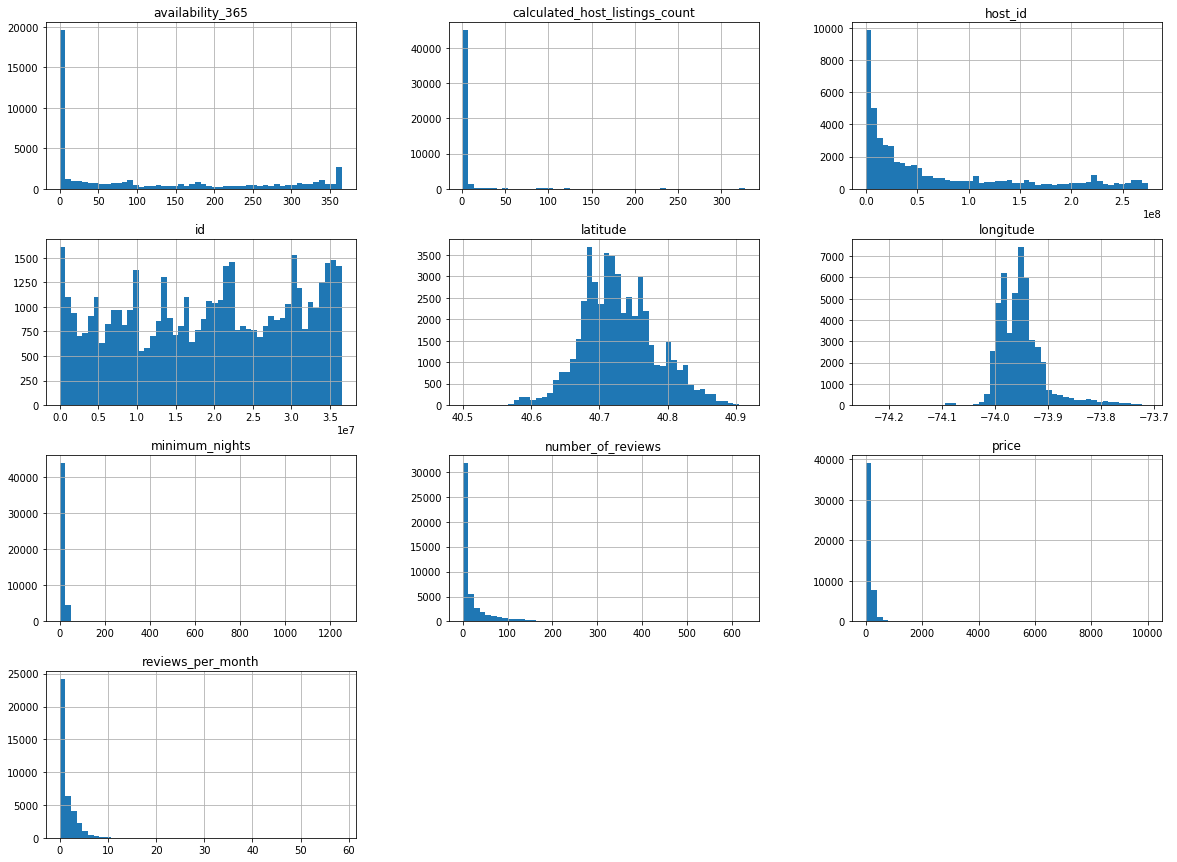

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

airbnb.hist(bins=50, figsize=(20,15))
plt.show()

I would like to remove some of the attributes from the dataset as they don't relate to our goal. The attributes that will be removed include; id, name, host_id, last_review, and host_name:

In [8]:
airbnb.drop(["id", "name", "host_id", "host_name", "last_review"],
           axis=1,
           inplace=True)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


## Discover and Visualize the Data
Let's visualize the data to gain further insights to the NY Airbnb listings. 

We will plot the latitude and longitude of each unit creating a nice visual representation of the postings over NYC. The color represents the price where red is most expensive and blue is cheaper. The size of the plot represents the number of nights the listing was not booked. The smaller the radious of the plot, more popular the listing was.

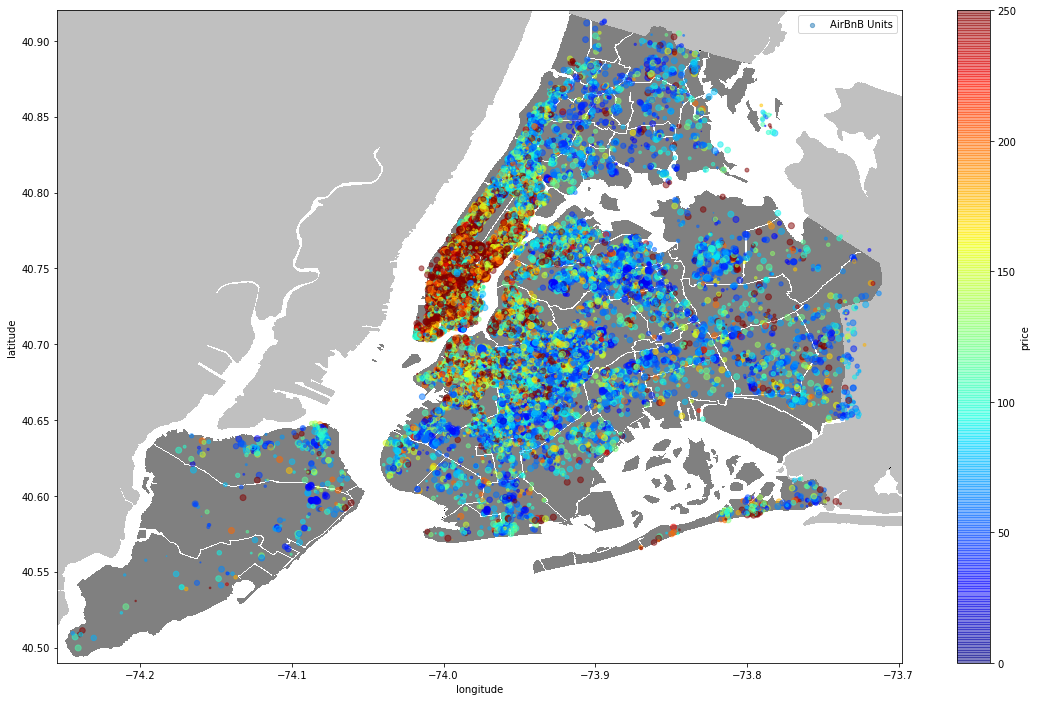

In [9]:
import urllib

#loading the png NYC image
image=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(image)

#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.255, -73.698, 40.49,40.92])
ax=plt.gca()

#using scatterplot
airbnb.plot(kind='scatter', x='longitude', y='latitude', 
            alpha=0.5,
            label="AirBnB Units", 
            figsize=(20,12),
            c='price', ax=ax,
            s=airbnb["availability_365"]/10,
            cmap=plt.get_cmap('jet'), 
            colorbar=True, 
            zorder=5, 
            vmax=250)


plt.legend()
plt.savefig("ny_airbnb.png")
plt.show()

It looks like the Manhattan are has high amount of postings. So let's create another version of this map zooming in to that section:

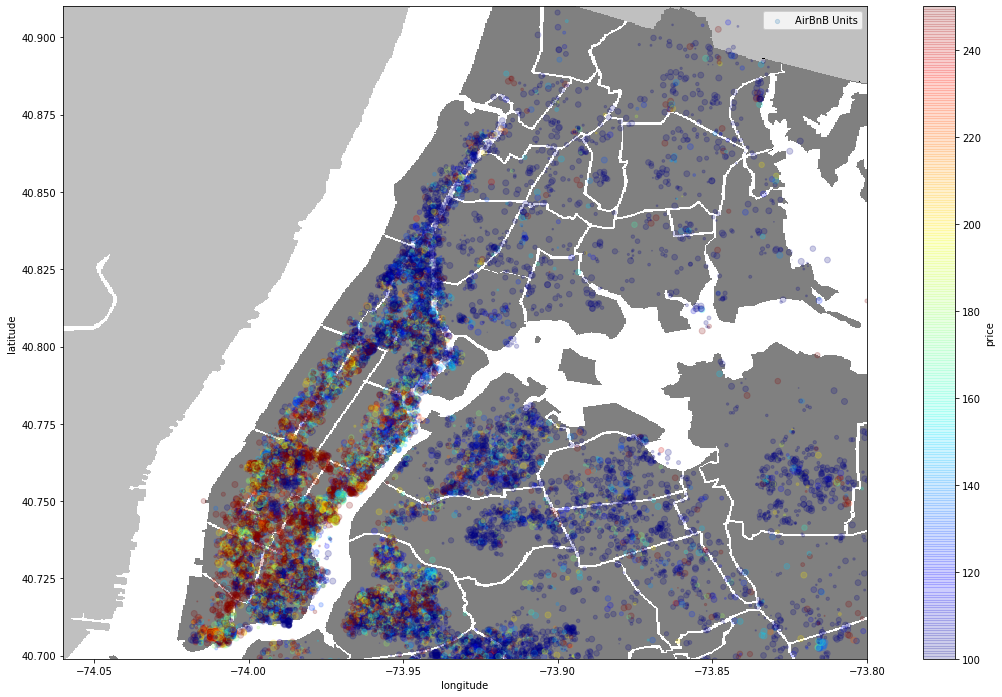

In [10]:
import urllib

#loading the png NYC image
image=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(image)

#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

#using scatterplot
airbnb.plot(kind='scatter', x='longitude', y='latitude', 
            alpha=0.2,
            label="AirBnB Units", 
            figsize=(20,12),
            c='price', ax=ax,
            s=airbnb["availability_365"]/10,
            cmap=plt.get_cmap('jet'), 
            colorbar=True, 
            zorder=5, 
            vmax=250,
            vmin=100)

ax.set_xlim(-74.06, -73.8) # Limit the region for zoom
ax.set_ylim(40.699, 40.91)


plt.legend()
plt.show()

This time the minimum price is set to 100. We can clearly see the most expensive part and part with the most postings. These maps allows us to see the distribution of the listings by their price. We can use another plot to see the distribution of the price instances by the neighborhood: 

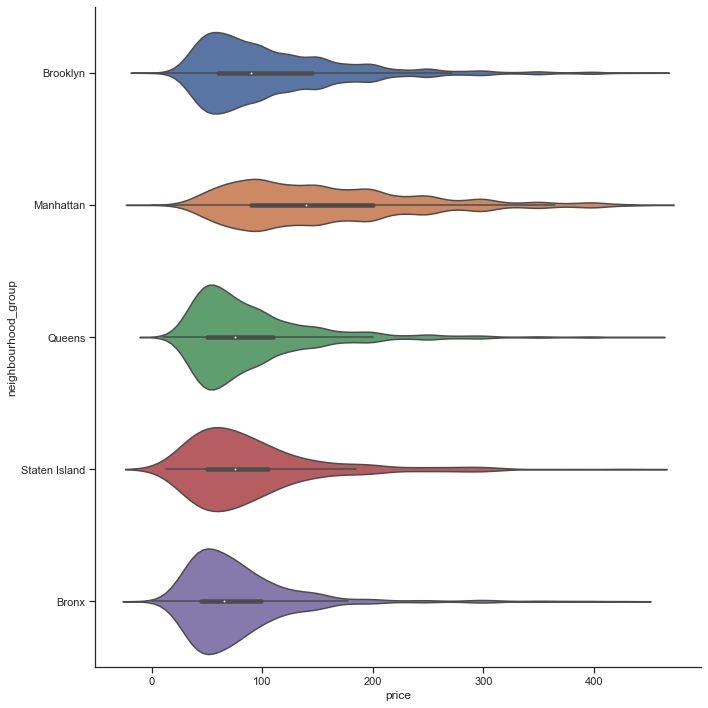

In [67]:
import seaborn as sns
sns.set(style="ticks", color_codes=True) #sns setting

# let's remove the outliers first
data = airbnb[airbnb["price"] < 450]

sns.catplot(x="price", 
            y="neighbourhood_group", 
            kind="violin",
            data=data,
            size=10);

We can see the Manhattan is more evenly distributed than other neighbourhood groups and there is a listing for high prices as well. On the other hand, it can be seen that Queens has large amount of listings around $50. This is expected as on our previous plot of NYC map, we saw large prices on Manhattan area.

Now let's take a look at the price and room type distribution for the neighbourhood groups:

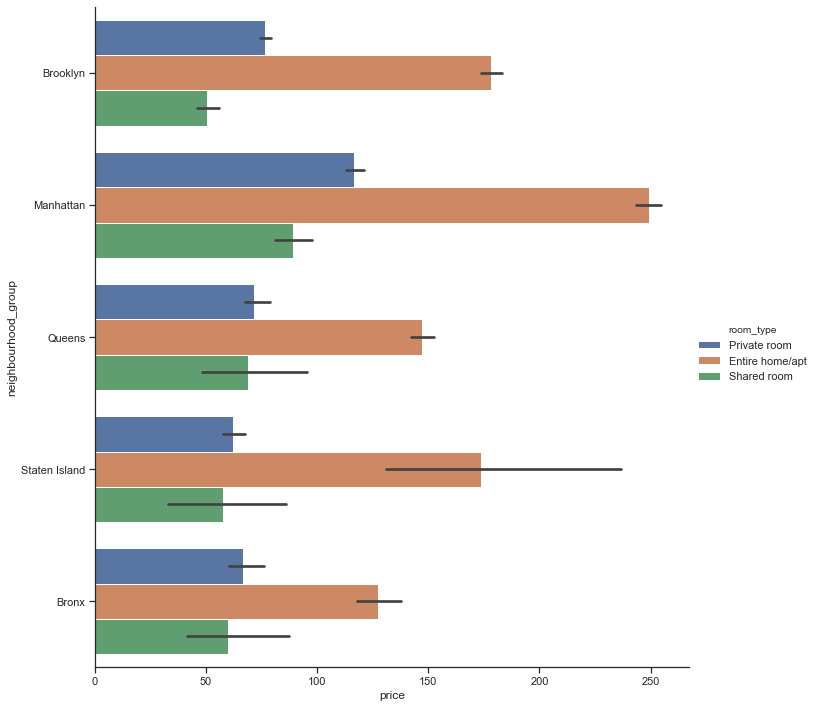

In [12]:
sns.catplot(x="price", 
            y="neighbourhood_group", 
            hue="room_type", 
            kind="bar", data=airbnb, size=10);

As expected, shared rooms are the cheapest, and entire home is the most expensive listing type for all the neighbourhood groups. It also looks like Manhattan has the most expensive listings (as expected from the previous plots). Let's compare number of listings per neighborhood group now:

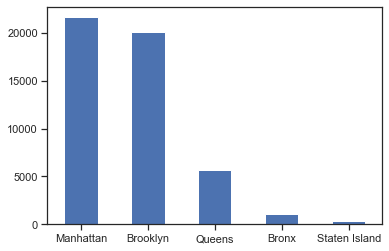

In [13]:
data = airbnb["neighbourhood_group"].value_counts()
ax = data.plot.bar(x='lab', y='val', rot=0)

As expected, Manhattan and Brooklyn has the most amount of Airbnb listings.

## Looking for Correlations
Before we proceed with a ML model, let's see if there are any correlations between any of the attributes with regard to the price of the listing:

In [14]:
corr_matrix = airbnb.corr()
corr_matrix["price"].sort_values(ascending=False)

price                             1.00000
availability_365                  0.08183
calculated_host_listings_count    0.05747
minimum_nights                    0.04280
latitude                          0.03394
reviews_per_month                -0.03061
number_of_reviews                -0.04795
longitude                        -0.15002
Name: price, dtype: float64

Not that much... We will leave this for now.

## Pre-processing
Let's prepare the data for the ML models. First, let's crate the training and test sets.

### Separate Training Set and Test Set:
Let's first separete the label's from features:

In [15]:
X = airbnb.drop("price", axis=1)
y = airbnb["price"].values.copy()

X.describe()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.00000,48895.00000,48895.00000,48895.00000,38843.00000,48895.00000,48895.00000
mean,40.72895,-73.95217,7.02996,23.27447,1.37322,7.14398,112.78133
std,0.05453,0.04616,20.51055,44.55058,1.68044,32.95252,131.62229
min,40.49979,-74.24442,1.00000,0.00000,0.01000,1.00000,0.00000
25%,40.69010,-73.98307,1.00000,1.00000,0.19000,1.00000,0.00000
50%,40.72307,-73.95568,3.00000,5.00000,0.72000,1.00000,45.00000
75%,40.76311,-73.93627,5.00000,24.00000,2.02000,2.00000,227.00000
max,40.91306,-73.71299,1250.00000,629.00000,58.50000,327.00000,365.00000


In [16]:
y

array([149, 225, 150, ..., 115,  55,  90])

Now let's split our dataset into training and test sets:

In [17]:
from sklearn.model_selection import train_test_split

# test set size of 20% of the data and the random seed 42 <3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train))
print(len(X_test))

print(len(y_train))
print(len(y_test))

39116
9779
39116
9779


### ML Pipeline
Now that we have separeted the labels from features and have the training and test set ready, we can setup the ML pipeline for pre-processing the dataset. 
First, we need a class to select data frames as we have separete pipelines for numerical and categorical data:

In [18]:
# https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb
# handson-ml2 GitHub
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

Let's write the pipeline for the categorical attributes. We have 3 of them; neighbourhood_group, neighbourhood, and room_type. We don't have any missing attributes for any of these attributes. So we will just use One Hot Encoding:

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

cat_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(["neighbourhood_group", "neighbourhood", "room_type"])),
    ("cat_encoder", OneHotEncoder(sparse=False, handle_unknown='ignore')), 
])

# HERE IGNORING UNKNOWN CATEGORIES IN ONE HOT ENCODER --> MUST HANDLE THIS BETTER WAY

Now let's setup the pipeline for the numerical data. The rest of the dataset consist of numerical attributes: latitude, longitude, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365. We do have missing data on reviews_per_month. We will replace null values with mean using Simple Imputer. Also, we will use Standart Scaler to normalize the numerical values:

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(["latitude", "longitude", "minimum_nights",
                                          "number_of_reviews", "reviews_per_month",
                                          "calculated_host_listings_count", "availability_365"])),
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler()),
])

Awesome! Now let's join all to a full pipeline:

In [21]:
from sklearn.pipeline import FeatureUnion

preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

Now our pipeline is ready to transform the dataset to be able to use in an ML model.

In [22]:
# fit transform the training set
X_train = preprocess_pipeline.fit_transform(X_train)
X_train

array([[-0.24117157, -0.06494562, -0.19302532, ...,  1.        ,
         0.        ,  0.        ],
       [ 2.20407747,  0.25703009, -0.23959609, ...,  0.        ,
         1.        ,  0.        ],
       [-0.71482401, -0.15554202, -0.23959609, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.99446739, -0.46513405,  1.06438535, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.84599275, -0.59939922, -0.23959609, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.32339867,  0.14688051, -0.09988379, ...,  1.        ,
         0.        ,  0.        ]])

In [23]:
# transform the test set
X_test = preprocess_pipeline.transform(X_test)
X_test

array([[-1.56516212, -0.55312336, -0.19302532, ...,  1.        ,
         0.        ,  0.        ],
       [-0.40815972,  0.96724507,  0.64524846, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59083633, -0.82230548, -0.23959609, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.55380932,  2.580817  , -0.28616685, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13082375, -0.59092618, -0.23959609, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.01563457, -0.58636377, -0.19302532, ...,  0.        ,
         1.        ,  0.        ]])

## Train Models and Evaluate on the Training Set
Let's first write a small function to print predictions with actual labels:

In [51]:
# output predictions from test set
import random

def prediction_test(model):
    
    some_data = airbnb.iloc[:5]   # Purely integer-location based indexing for selection by position
    some_labels = airbnb["price"].iloc[:5]
    some_data_prepared = preprocess_pipeline.transform(some_data)
    
    predictions = model.predict(some_data_prepared)
    some_labels = list(some_labels)
    
    print("Predictions\t", "Actual\t\t", "Difference %")
    for index in range(len(predictions)):
        diff = (abs(predictions[index] - some_labels[index]) / some_labels[index]) * 100.0
        print('${:,.2f}'.format(predictions[index]), "\t", 
              '${:,.2f}'.format(some_labels[index]), "\t", 
              "%.2f" % diff+"%")

We should also write a function that we can use to print out the Measured RMSE:

In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np

def measure_rmse(X, y, model):
    predictions = model.predict(X)
    lin_mse = mean_squared_error(y, predictions)
    lin_rmse = np.sqrt(lin_mse)
    print("RMSE: ", "%.4f" % lin_rmse)

In addition, we need a functon for cross-validation to check if we are overfitting the data:

In [39]:
from sklearn.model_selection import cross_val_score

def cross_val(X, y, model):
    scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    
    print("Scores:", rmse_scores)
    print("Mean:", rmse_scores.mean())
    print("Standard deviation:", rmse_scores.std())

### Linear Regression Model
We can start by training a basic Linear Regression model: 

In [26]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Measure the RMSE on the training set to see the error:

In [27]:
measure_rmse(X_train, y_train, lin_reg)

RMSE:  232.7039


This doesn't look that good... Our model is off by $232. Perhaps we migh need a more complex model. Let's print out some predictions:

In [28]:
prediction_test(lin_reg)

Predictions	 Actual		 Difference %
$105.59 	 $149.00 	 29.14%
$346.09 	 $225.00 	 53.82%
$139.32 	 $150.00 	 7.12%
$156.96 	 $89.00 	 76.36%
$179.70 	 $80.00 	 124.63%


Let's perform Linear Regression using Stochastic Gradient Descent. Stochastic GD picks a random instance in the training set at every step and computes the gradients based only on single instance:

In [29]:
from sklearn.linear_model import SGDRegressor 

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X_train, y_train)

# print RMSE on the training set
measure_rmse(X_train, y_train, sgd_reg)
# print some predictions
prediction_test(sgd_reg)

RMSE:  245.9057
Predictions	 Actual		 Difference %
$158.03 	 $149.00 	 6.06%
$436.19 	 $225.00 	 93.86%
$238.13 	 $150.00 	 58.75%
$131.86 	 $89.00 	 48.16%
$233.32 	 $80.00 	 191.65%


### Polynomial Regression
The results for the Linear Regression wasn't good. Let's train a Polynomial Regression model to see if we will see improvment. First, we need to add polynomial features to the training data:

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

Now we can train our model:

In [ ]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)

Let's see how our model will perform:

In [ ]:
# print RMSE on the training set
measure_rmse(X_poly, y_train, poly_reg)
# print some predictions
prediction_test(poly_reg)

### Decision Tree
Let's see if we will do better with Decision Tree. Train a decision tree with the training data:

In [30]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [53]:
# print RMSE on the training set
measure_rmse(X_train, y_train, tree_reg)
# print some predictions
prediction_test(tree_reg)

RMSE:  0.1788
Predictions	 Actual		 Difference %
$149.00 	 $149.00 	 0.00%
$399.00 	 $225.00 	 77.33%
$150.00 	 $150.00 	 0.00%
$89.00 	 $89.00 	 0.00%
$115.00 	 $80.00 	 43.75%


Wow! This looks very good. We only have RMSE of $0.18, and our predictions looks very close. We might be overfitting the data. So we should do cross validation on validation test to ensure that this isn't the case:

In [37]:
cross_val(X_train, y_train, tree_reg)

Scores: [289.6812145  232.20283525 239.80894268 391.81337961 301.18105877
 370.34713653 251.55789611 348.89705787 370.69624969 387.15263775]
Mean: 318.33384087601786
Standard deviation: 59.72898118135197


Yeah, we are overfitting the data a lot... It performed way worse than the Linear Regression Model with mean error of $318.

### Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [41]:
# print RMSE on the training set
measure_rmse(X_train, y_train, forest_reg)
# print some predictions
prediction_test(forest_reg)

RMSE:  89.1092
Predictions	 Actual		 Difference %
$115.27 	 $149.00 	 22.64%
$473.74 	 $225.00 	 110.55%
$131.13 	 $150.00 	 12.58%
$108.90 	 $89.00 	 22.36%
$153.10 	 $80.00 	 91.38%


This is much better than the Linear Regression model. Let's see if the Random Forest is overfitting as well:

In [42]:
cross_val(X_train, y_train, forest_reg)

Scores: [167.21197039 180.49332925 194.94458098 281.57284487 197.22889721
 247.42883181 210.34545308 227.42334305 283.61614316 334.73216447]
Mean: 232.4997558263577
Standard deviation: 50.82673200467254


Thi looks much better, but let's see if we can improve our model. Let's do Grid Search to fine tune this model:

In [55]:
from sklearn.model_selection import GridSearchCV

# grid parameters
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators':[3,10], 'max_features':[2,3,4]},
]

# random forest instance
forest_reg = RandomForestRegressor()

# grid instance
grid_search = GridSearchCV(forest_reg, param_grid, cv=2,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

# train
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

Now let's choose the best estimator features from the grid search and evaluate the model on test set:

In [58]:
# get the fine-tuned model for better results
improved_model = grid_search.best_estimator_

# predictions
predictions = improved_model.predict(X_test)

# let's look at the error
final_mse = mean_squared_error(y_test, predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

189.5178792338802

This is so much better than the linear model, however the model is still off by $189 which is a large error value to have for a Airbnb listing. Let's see if we can improve the model by removing some of the features.

## Part 2 - Search of Better Feature Combinations
This time we will focus on only few features that we think are important. Let's start by rewriting the the ML pipeline. First we need to separete the training and test again:

In [59]:
# test set size of 20% of the data and the random seed 42 <3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train))
print(len(X_test))

print(len(y_train))
print(len(y_test))

39116
9779
39116
9779


Now we can re-write the pipeline with the features we want:

In [60]:
# categorical data pipeline
# removed: "neighbourhood"
cat_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(["neighbourhood_group", "room_type"])), 
    ("cat_encoder", OneHotEncoder(sparse=False, handle_unknown='ignore')), 
])

# HERE IGNORING UNKNOWN CATEGORIES IN ONE HOT ENCODER --> MUST HANDLE THIS BETTER WAY

# numerical data pipeline
# removed: "number_of_reviews", "reviews_per_month", "calculated_host_listings_count"
num_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(["latitude", "longitude", "minimum_nights", "availability_365"])),
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler()),
])

# full-pipeline
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

Transform the training and test set:

In [61]:
# fit transform the training set
X_train = preprocess_pipeline.fit_transform(X_train)

# transform the test set
X_test = preprocess_pipeline.transform(X_test)

Since the best result was from the Random Forest model, let's use that model again:

In [62]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [63]:
# print RMSE on the training set
measure_rmse(X_train, y_train, forest_reg)
# print some predictions
prediction_test(forest_reg)

RMSE:  91.6393
Predictions	 Actual		 Difference %
$124.76 	 $149.00 	 16.27%
$490.92 	 $225.00 	 118.19%
$131.76 	 $150.00 	 12.16%
$130.68 	 $89.00 	 46.83%
$135.41 	 $80.00 	 69.26%


Now let's do grid search and evaluate the model on the best features using the test set:

In [65]:
from sklearn.model_selection import GridSearchCV

# grid parameters
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators':[3,10], 'max_features':[2,3,4]},
]

# random forest instance
forest_reg = RandomForestRegressor()

# grid instance
grid_search = GridSearchCV(forest_reg, param_grid, cv=2,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

# train
grid_search.fit(X_train, y_train)

# get the fine-tuned model for better results
improved_model = grid_search.best_estimator_

# predictions
predictions = improved_model.predict(X_test)

# let's look at the error
final_mse = mean_squared_error(y_test, predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

196.38799511690604

This shows that the previous model with more features was more successful than this model with less features.